In [134]:
import pandas as pd
import numpy as np

df=pd.read_csv(r'Bank_Target_Marketing.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56368,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
56369,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
56370,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
56371,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<Axes: >

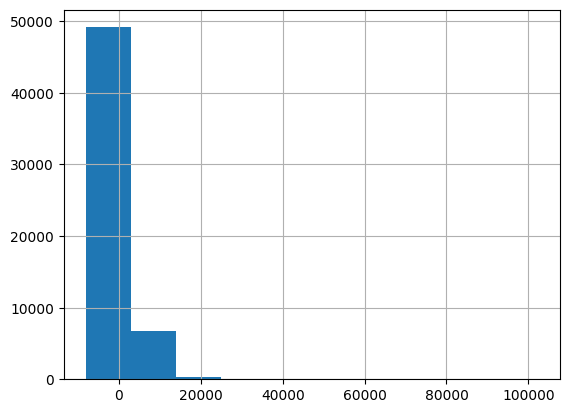

In [135]:
df.balance.hist()

In [136]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df['log_balance']=pt.fit_transform(df.balance.values.reshape(-1,1))

<Axes: >

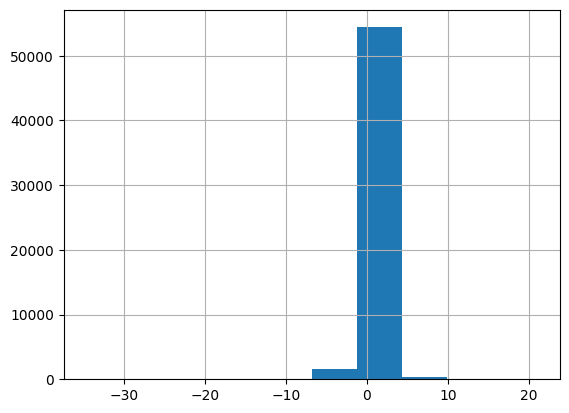

In [137]:
df.log_balance.hist()

<Axes: >

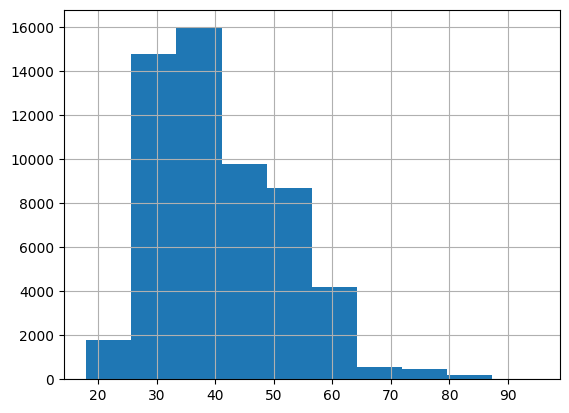

In [138]:
df.age.hist()

In [139]:
df.age.describe()

count    56373.000000
mean        40.994767
std         10.887854
min         18.000000
25%         33.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

<Axes: >

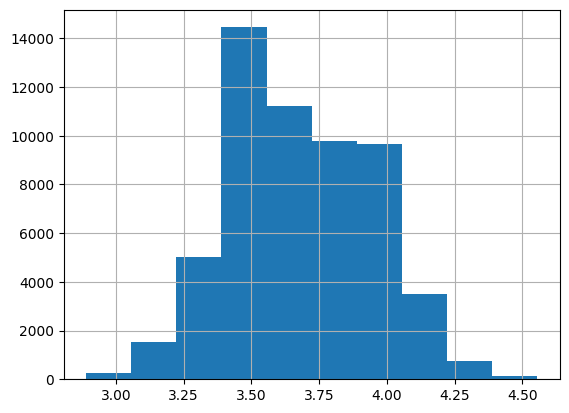

In [140]:
df['log_age']=np.log(df.age)
df.log_age.hist()

In [141]:
from scipy import stats

res = stats.jarque_bera(df.log_age)

res2 = stats.jarque_bera(df.age)

print(res2.pvalue)
print(res.pvalue)

0.0
8.097190910508327e-157


In [143]:
df[['age','balance']].corr()

,age,balance
age,1.00000,0.10125
balance,0.10125,1.00000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
X = df['age']
y = df['balance']

model.fit(X.values.reshape(-1,1),y)

predictions = model.predict(X.values.reshape(-1,1))

r2 = r2_score(y,predictions)
rmse = mean_squared_error(y, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.010251581030831791
The rmse is:  3066.1925775225404


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
